<a href="https://colab.research.google.com/github/unicornpjs/Dubai_UG_3/blob/main/UG3_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Importing the necessary libraries
import sys
assert sys.version_info >= (3, 5)
import numpy as np
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [19]:
# prompt to upload your dataset files
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving atlantic.csv to atlantic (1).csv


In [3]:
#prompt you to upload your dataset files
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving pacific.csv to pacific.csv


In [5]:
#Importing the necessary dataset files
atlantic_data = pd.read_csv('atlantic.csv')
pacific_data = pd.read_csv('pacific.csv')

In [7]:
combined_data = pd.concat([atlantic_data, pacific_data], axis=1)
#Combines the two datasets

In [20]:
# excludes columns from the dataset that do not contain numerical values
non_numeric_columns = combined_data.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: Index(['ID', 'Name', 'Event', 'Status', 'Latitude', 'Longitude', 'ID', 'Name',
       'Event', 'Status', 'Latitude', 'Longitude'],
      dtype='object')


In [9]:
# removes all null values
combined_data_numeric = combined_data.drop(non_numeric_columns, axis=1)
combined_data_numeric = combined_data_numeric.dropna()

In [11]:
#Scaling to pre process the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data_numeric)

In [12]:
# CHoosing number of clusters
num_clusters = 3
# Applying K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [14]:
#get labels for clusters
labels = kmeans.labels_
combined_data_numeric['Cluster'] = labels

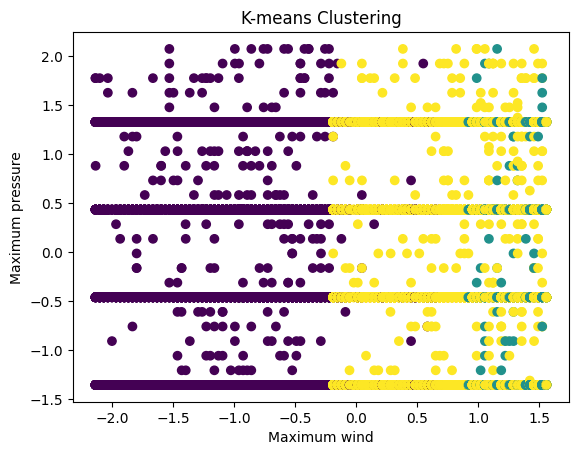

In [16]:
#Visualize the data by plotting it and using appropriate labes for the X and Y axis
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('Maximum wind')
plt.ylabel('Maximum pressure')
plt.title('K-means Clustering')
plt.show()